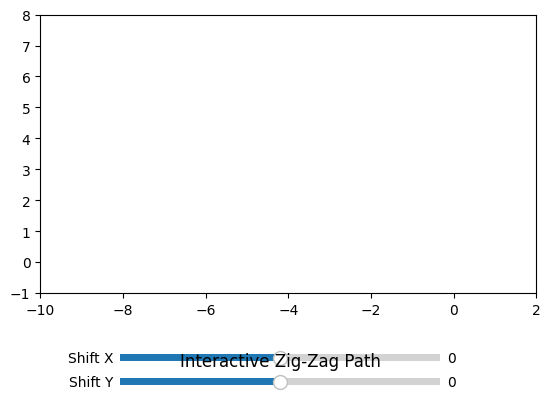

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

# Initial path coordinates
x_coords = [0, 0, -2, -2, -4, -4, -6, -6, -8, -8]
y_coords = [0, 3, 3, 6, 6, 3, 3, 6, 6, 3]

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)  # Space for sliders

ax.set_xlim(-10, 2)
ax.set_ylim(-1, 8)
line, = ax.plot([], [], marker='o', linestyle='-', color='b')

# Sliders for tweaking
ax_x_shift = plt.axes([0.25, 0.15, 0.5, 0.03])
ax_y_shift = plt.axes([0.25, 0.1, 0.5, 0.03])

slider_x = Slider(ax_x_shift, 'Shift X', -5, 5, valinit=0)
slider_y = Slider(ax_y_shift, 'Shift Y', -5, 5, valinit=0)

def update(val):
    shift_x = slider_x.val
    shift_y = slider_y.val
    new_x = [x + shift_x for x in x_coords]
    new_y = [y + shift_y for y in y_coords]
    line.set_data(new_x, new_y)
    fig.canvas.draw_idle()

slider_x.on_changed(update)
slider_y.on_changed(update)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Interactive Zig-Zag Path")
plt.grid(True)

plt.show()


In [4]:
import numpy as np
z= np.ones(10)
z

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
def plot(x,y):
    x_coords = [0, 0, -2, -2, -4, -4, -6, -6, -8, -8];
    y_coords = [0, 3, 3, 6, 6, 3, 3, 6, 6, 3];
    print(x<<y);
plot(4,5)


128


In [14]:
z=[2,3,4,45,4]
z.pop(3)

45

In [15]:
?z

Type:        list
String form: [2, 3, 4, 4]
Length:      4
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [17]:
import numpy as np
np.random.seed(0)
z1 = np.random.randint(10,size=6)
z1

array([5, 0, 3, 3, 7, 9])

In [24]:
import skimage
from skimage import io
photo = io.imread('')
# type(photo)
photo.shape

<class 'OSError'>: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [22]:
photo.shape

<class 'NameError'>: name 'photo' is not defined

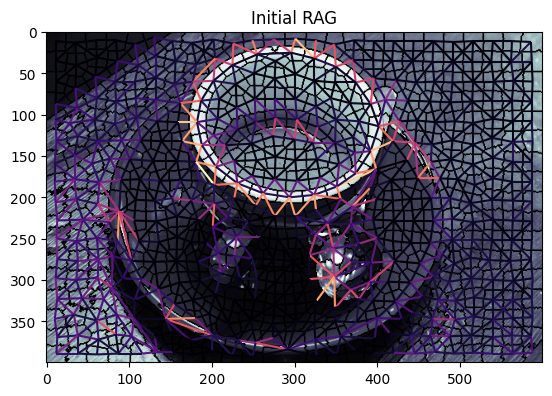

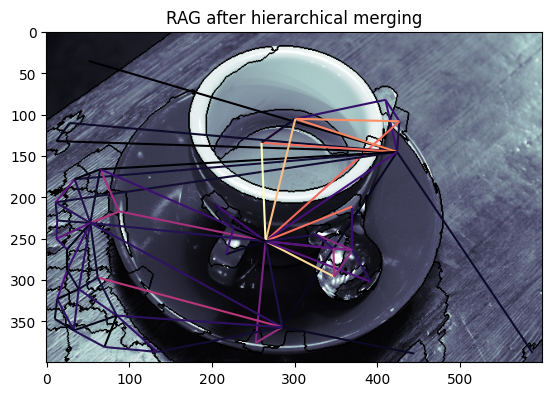

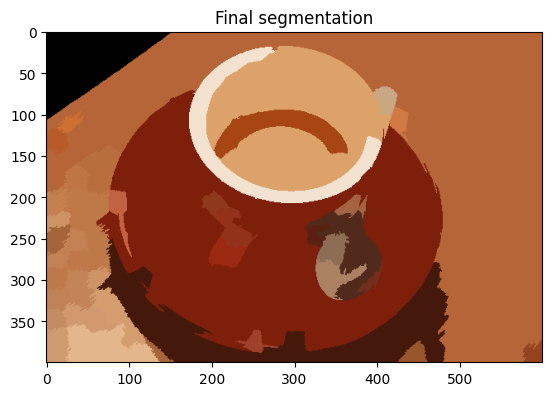

In [3]:
from skimage import data, segmentation, filters, color
from skimage import graph
from matplotlib import pyplot as plt


def weight_boundary(graph, src, dst, n):
    """
    Handle merging of nodes of a region boundary region adjacency graph.

    This function computes the `"weight"` and the count `"count"`
    attributes of the edge between `n` and the node formed after
    merging `src` and `dst`.


    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the "weight" and "count" attributes to be
        assigned for the merged node.

    """
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst) / count,
    }


def merge_boundary(graph, src, dst):
    """Call back called before merging 2 nodes.

    In this case we don't need to do any computation here.
    """
    pass


img = data.coffee()
edges = filters.sobel(color.rgb2gray(img))
labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)
g = graph.rag_boundary(labels, edges)

graph.show_rag(labels, g, img)
plt.title('Initial RAG')

labels2 = graph.merge_hierarchical(
    labels,
    g,
    thresh=0.08,
    rag_copy=False,
    in_place_merge=True,
    merge_func=merge_boundary,
    weight_func=weight_boundary,
)

graph.show_rag(labels, g, img)
plt.title('RAG after hierarchical merging')

plt.figure()
out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
plt.imshow(out)
plt.title('Final segmentation')

plt.show()

In [7]:
from skimage import io
photo = io.imread('fpga.png')
type(photo)

numpy.ndarray

In [ ]:
photo.shape


(2548, 3784, 4)

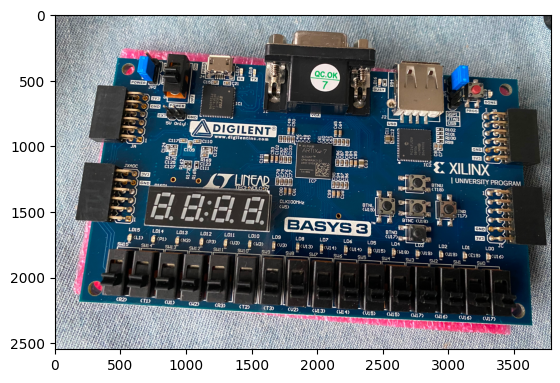

In [9]:
import matplotlib.pyplot as plt
plt.imshow(photo)